In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental/survey (1).csv


In [17]:

import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('/kaggle/input/mental/survey (1).csv') 

In [19]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [21]:
print(df['Country'].value_counts())


Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [22]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [23]:
print(df['state'].value_counts())

state
CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64


In [24]:
df.drop(columns=['Timestamp','state','Country','comments'],inplace=True)

In [25]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [26]:
print(df['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [27]:
print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [28]:
df.drop(df[df['Age']<0].index, inplace=True)
df.drop(df[df['Age']>100].index, inplace=True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [ ]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)




In [29]:
df['Gender'].value_counts()

Gender
Male                                              613
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Female                                              2
Cis Male                                            2
Man                                                 2
msle                                                1
male leaning androgynous                            1
Cis Man                                             1
Trans woman          

In [30]:
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

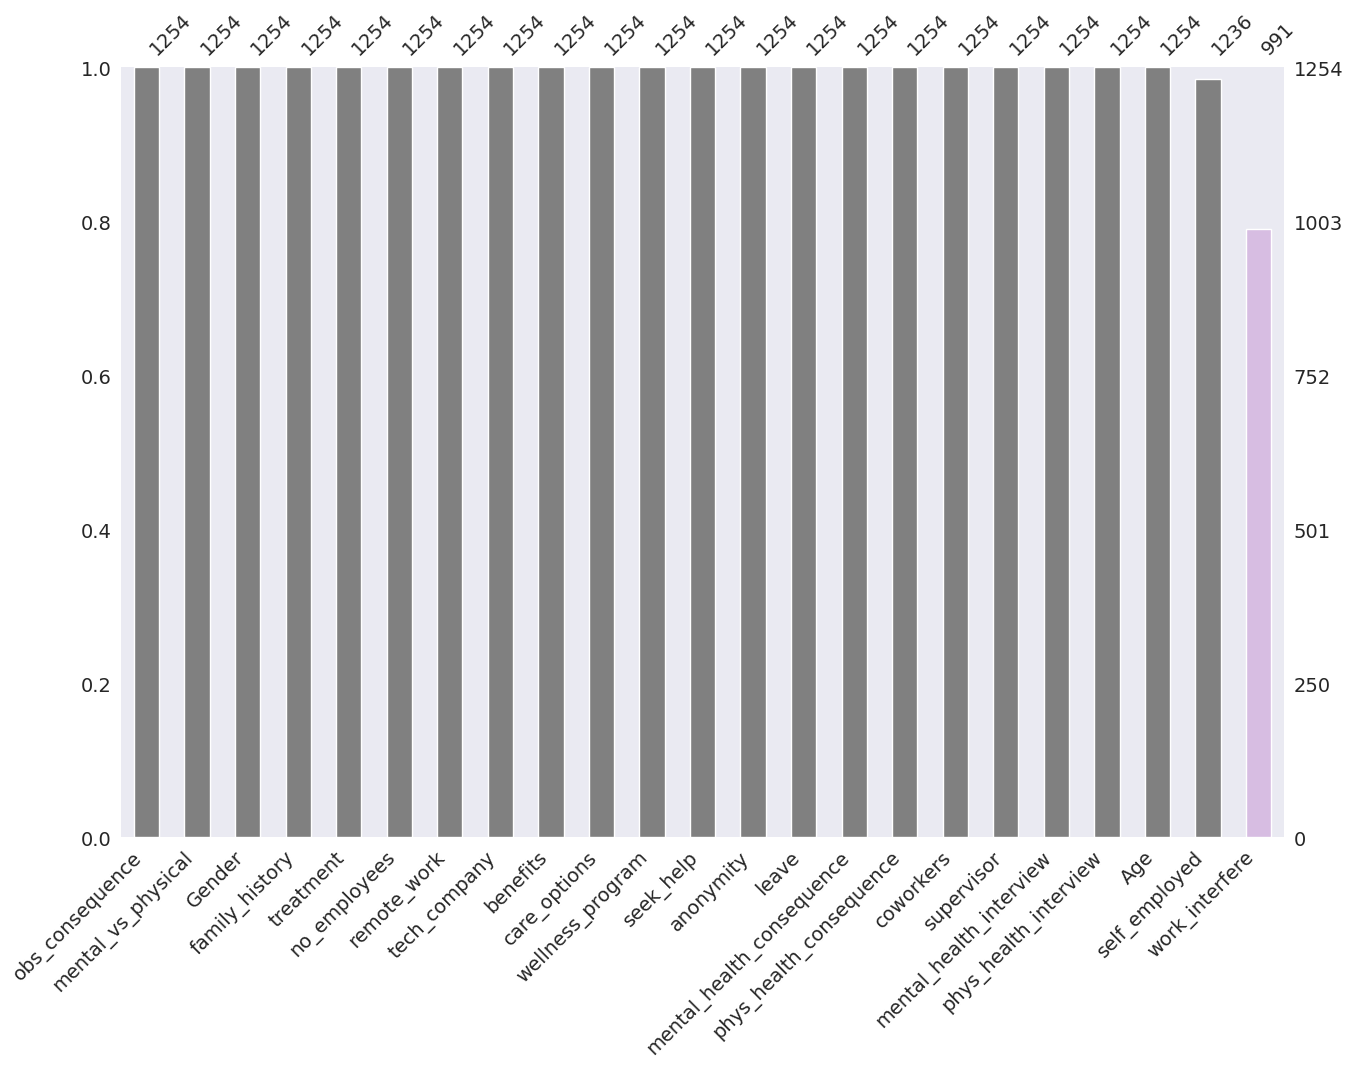

In [31]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,10))


plt.show()

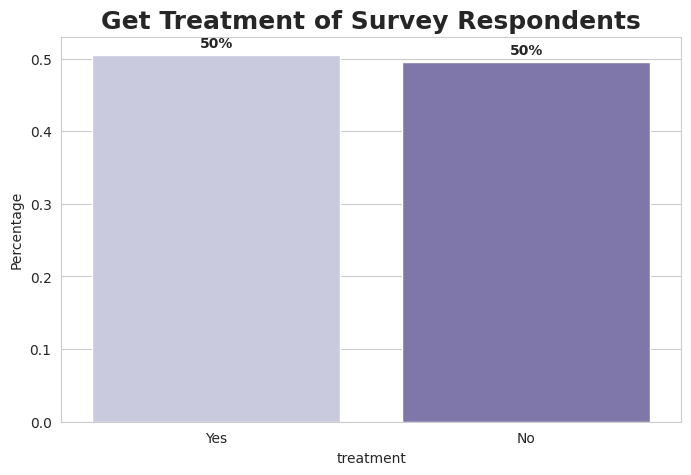

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

ValueError: Cannot use `hue` without `x` and `y`

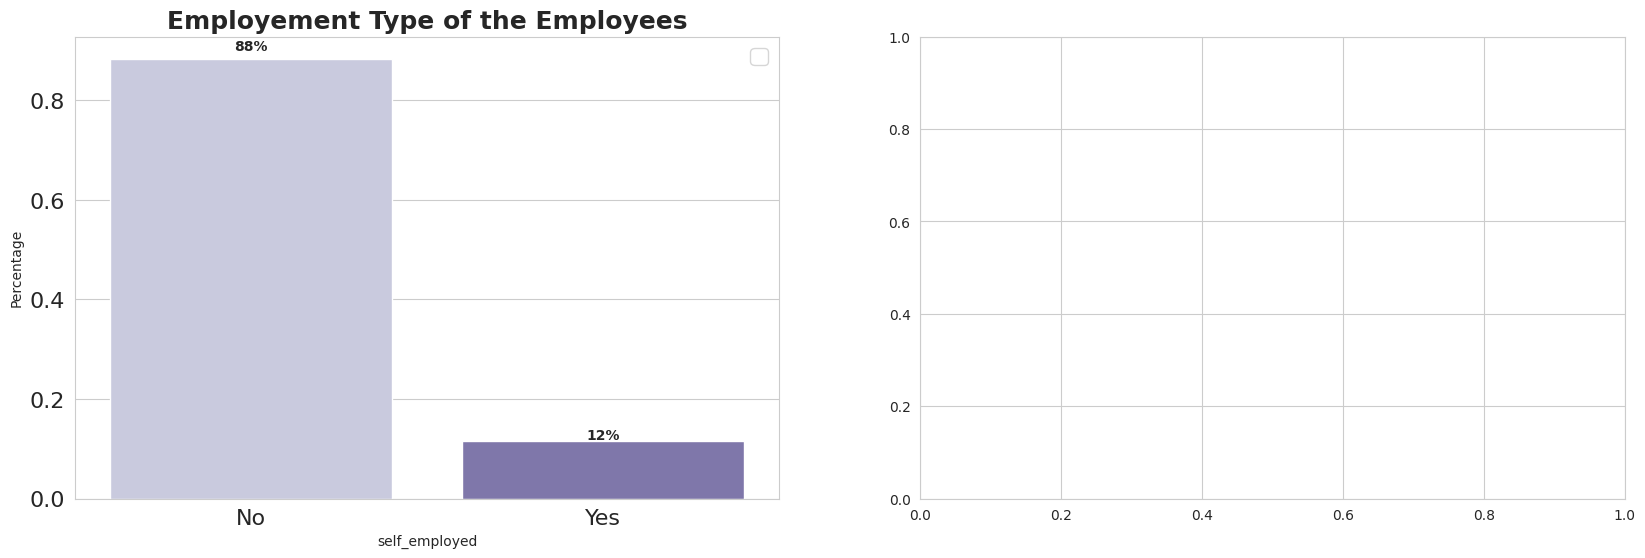

In [33]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['self_employed'], hue = df['treatment'], palette = 'Purples')
plt.title('Employement Type of the Employees who are seeking Treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

ValueError: Cannot use `hue` without `x` and `y`

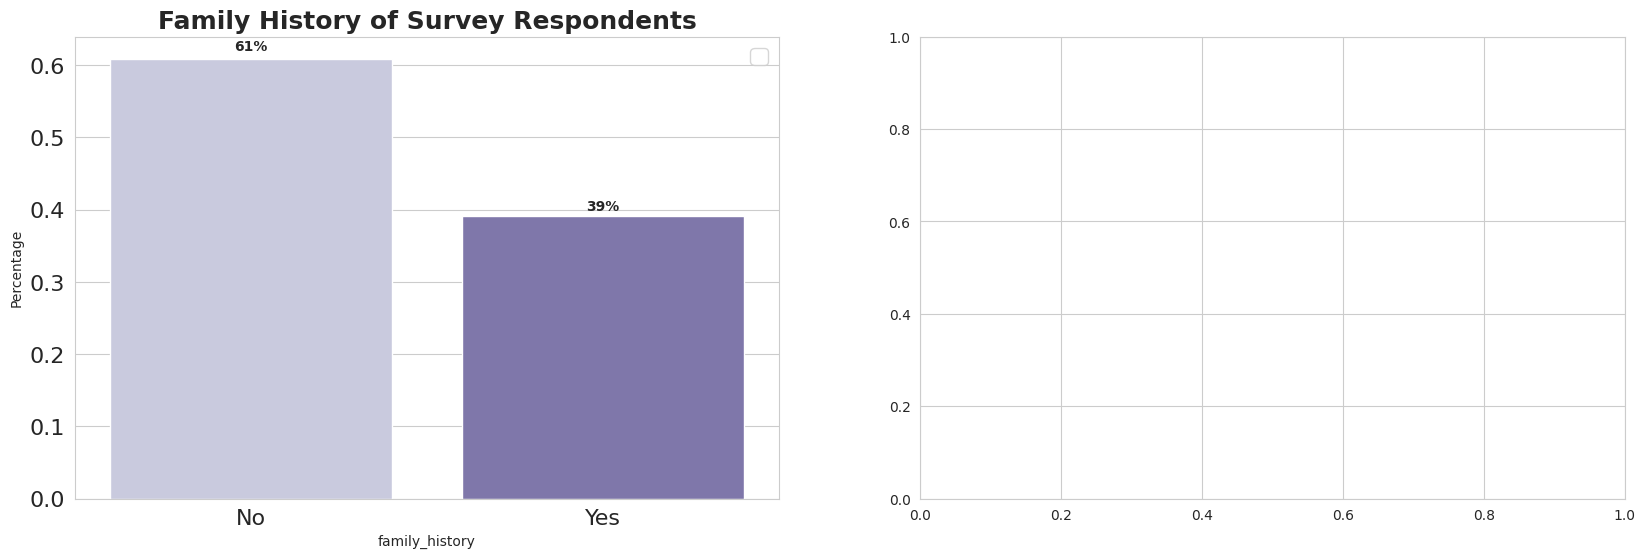

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name='Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'], palette='Purples')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


ValueError: Cannot use `hue` without `x` and `y`

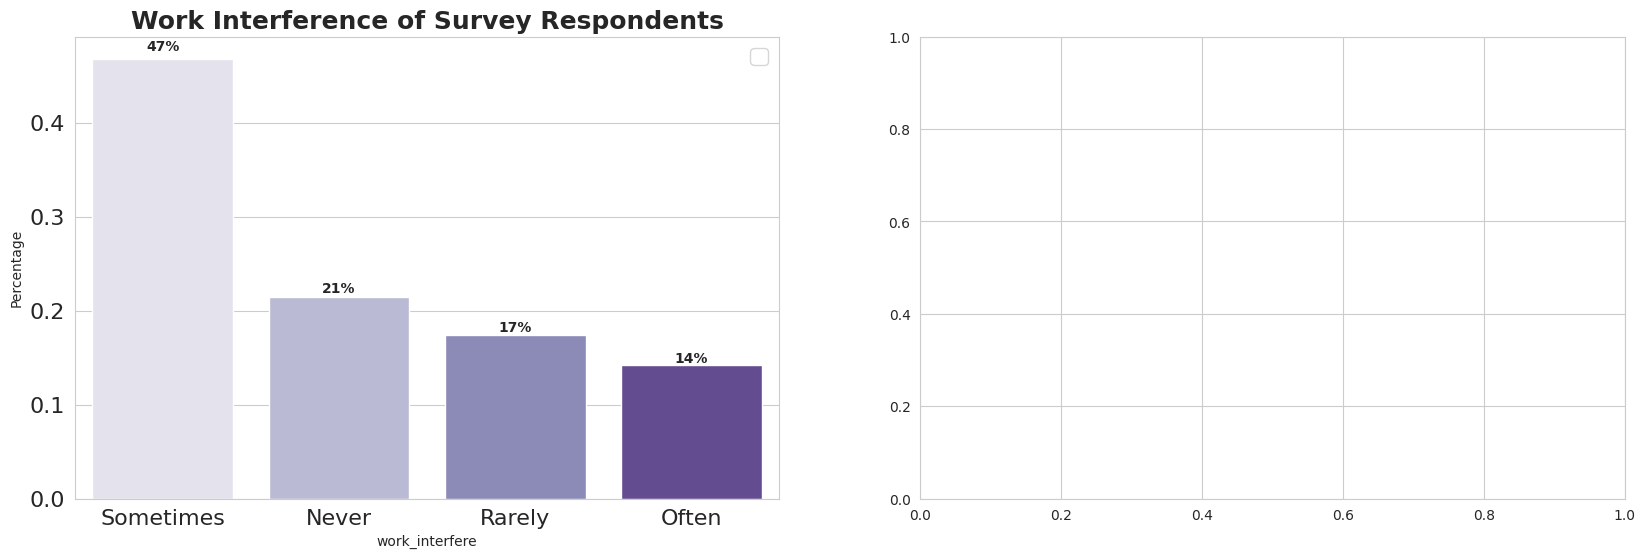

In [35]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'], palette = 'Purples')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

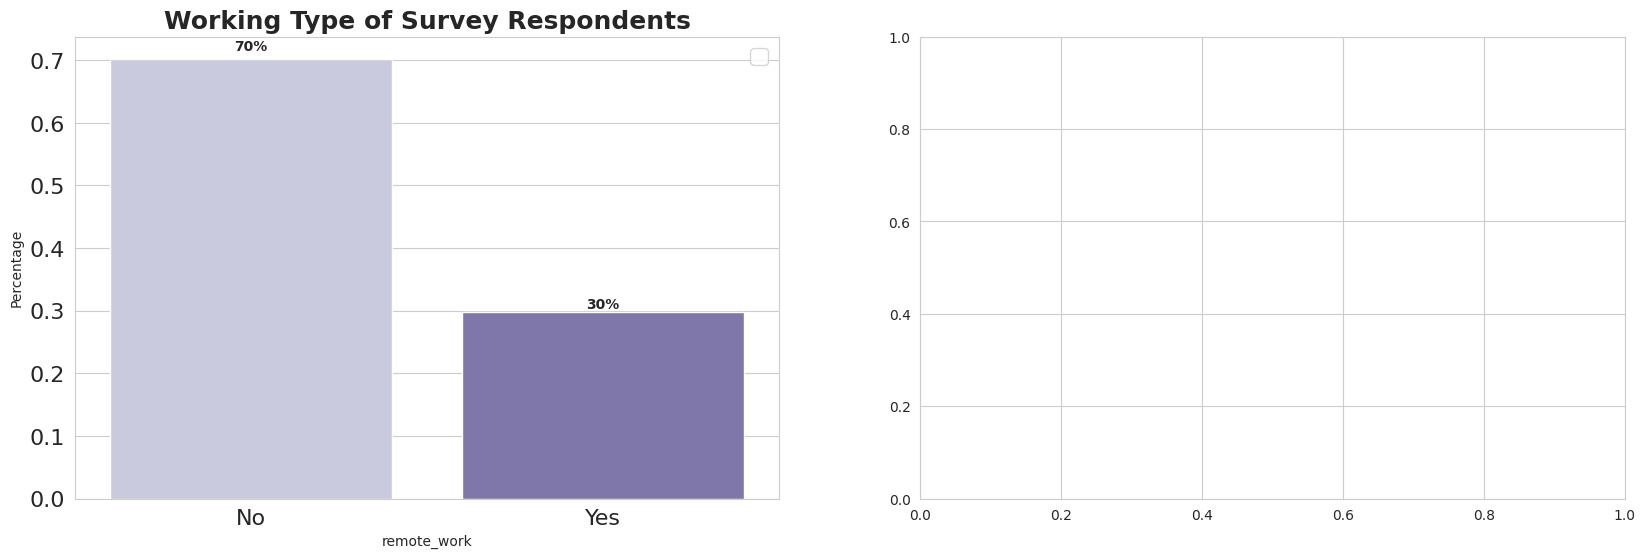

In [36]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['remote_work'], hue = df['treatment'], palette='Purples')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


ValueError: Cannot use `hue` without `x` and `y`

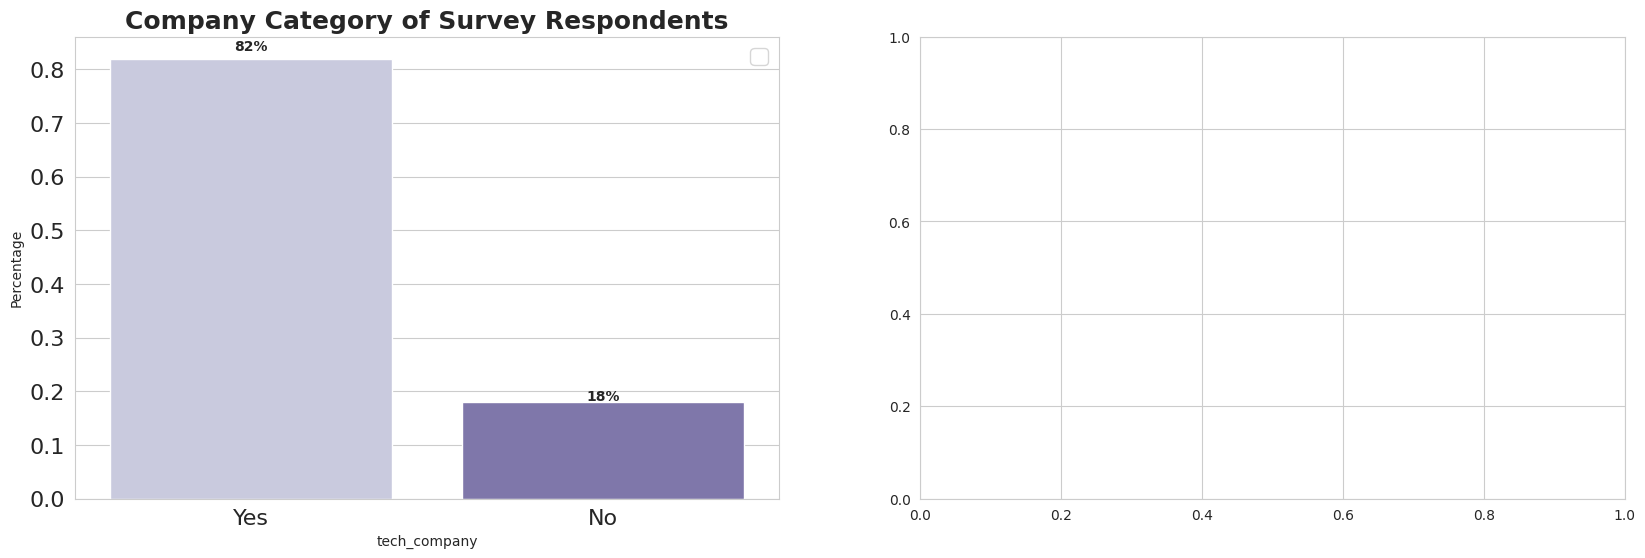

In [37]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['tech_company'], hue = df['treatment'], palette='Purples')
plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


ValueError: Cannot use `hue` without `x` and `y`

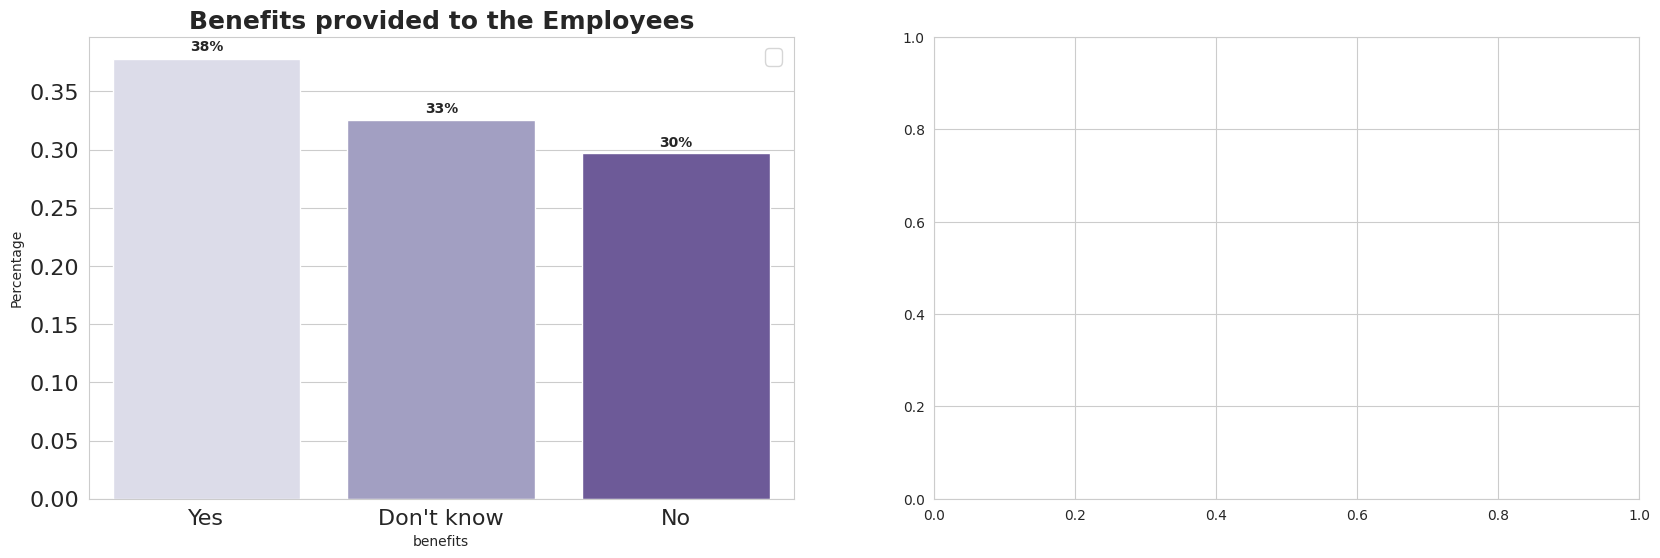

In [38]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['benefits'], hue = df['treatment'], palette='Purples')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

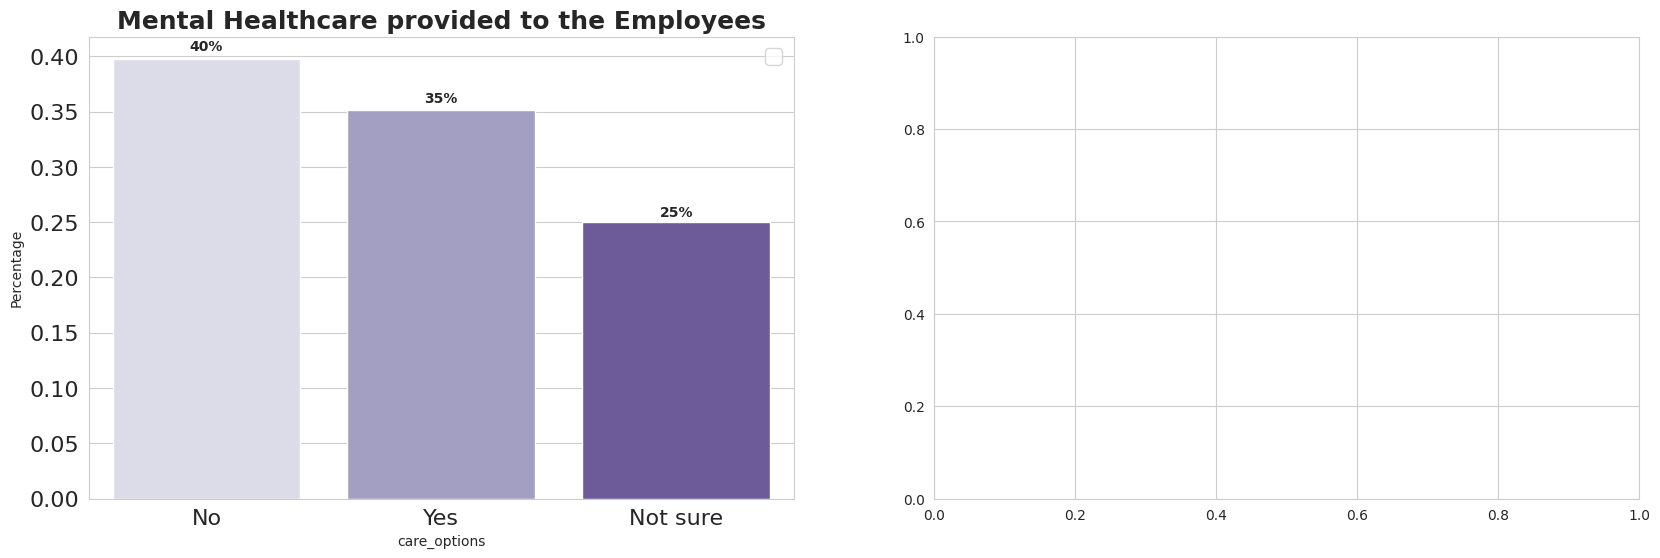

In [39]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['care_options'], hue = df['treatment'], palette='Purples')
plt.title('Mental Heathcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


ValueError: Cannot use `hue` without `x` and `y`

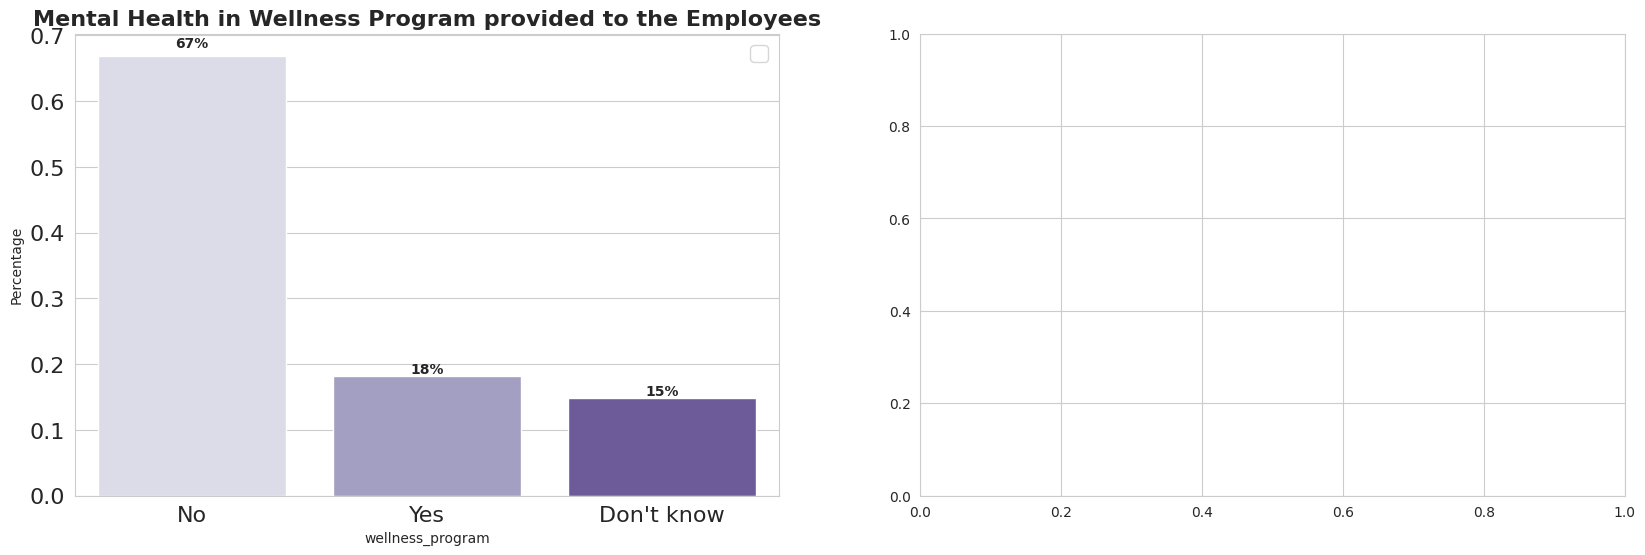

In [40]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['wellness_program'], hue = df['treatment'], palette='Purples')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

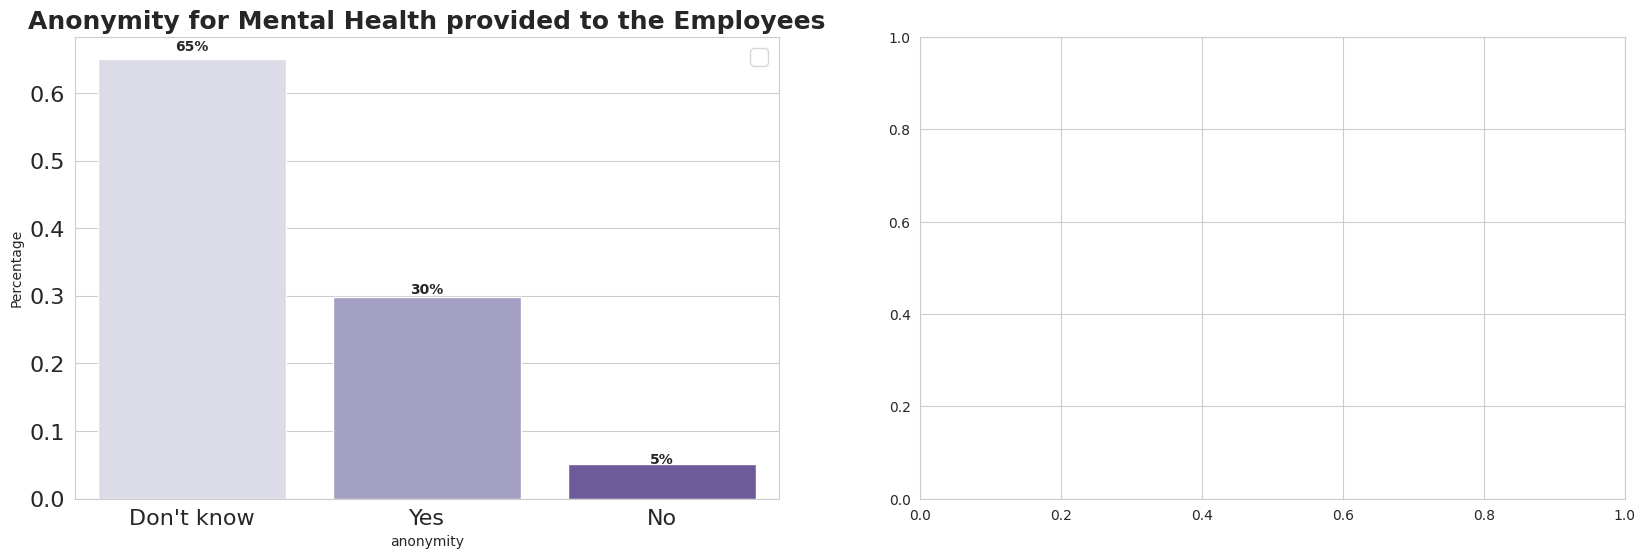

In [41]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['anonymity'], hue = df['treatment'], palette='Purples')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


ValueError: Cannot use `hue` without `x` and `y`

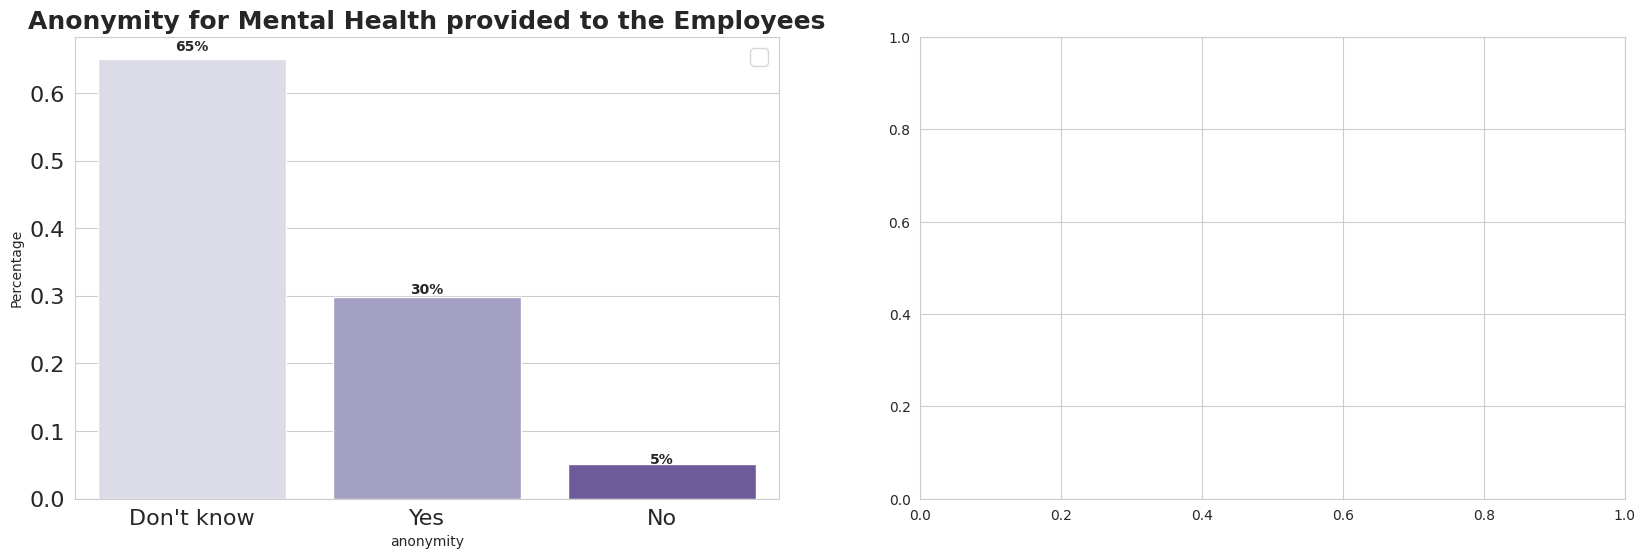

In [42]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['anonymity'], hue = df['treatment'], palette='Purples')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

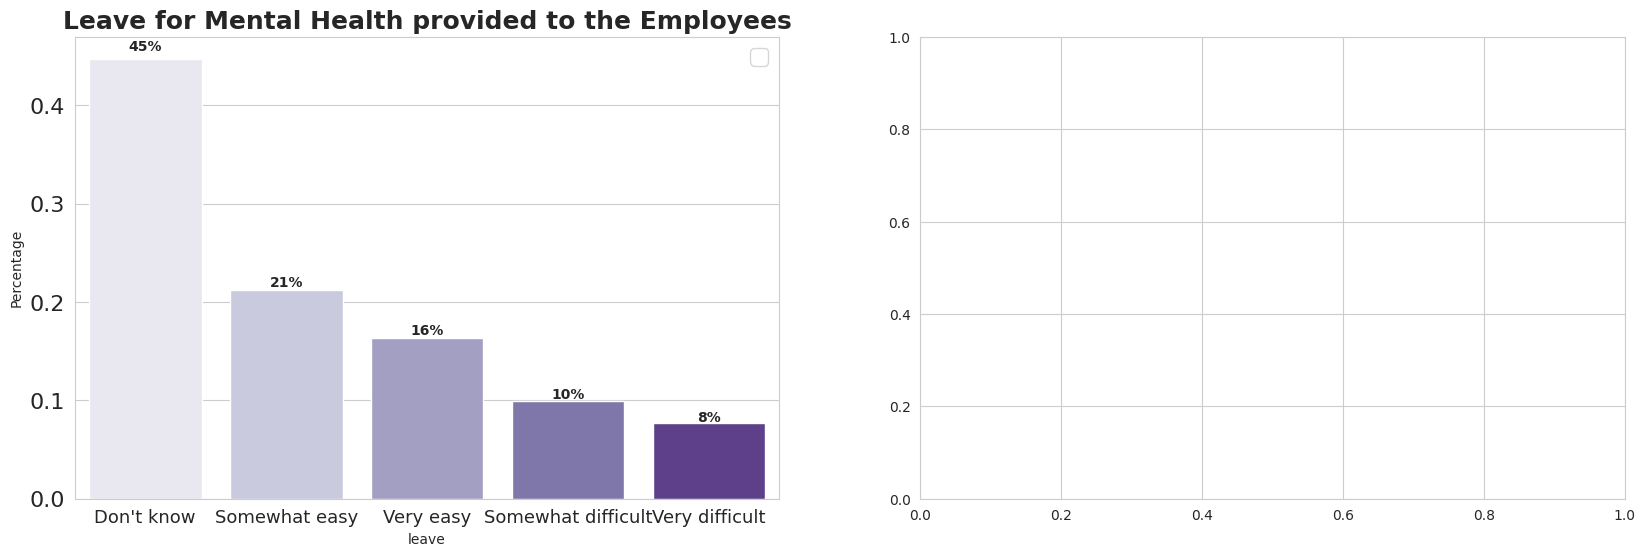

In [43]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['leave'], hue = df['treatment'], palette='Purples')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

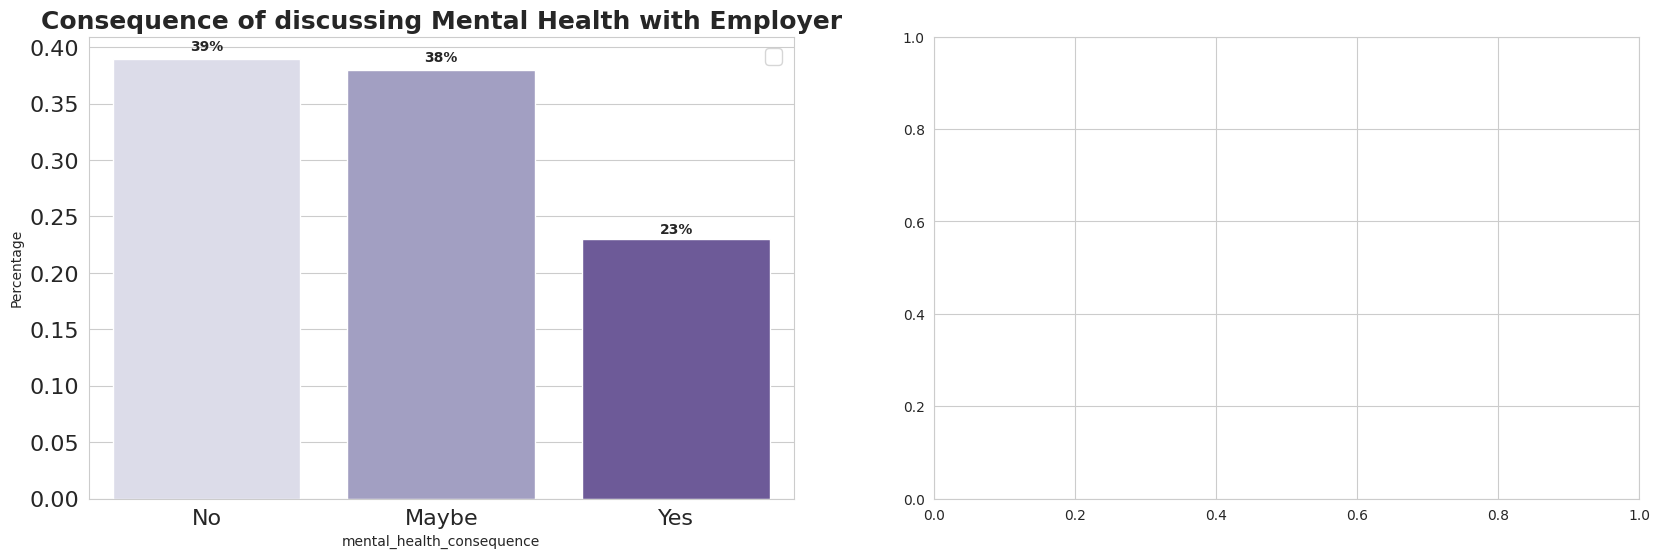

In [44]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_consequence'], hue = df['treatment'], palette='Purples')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

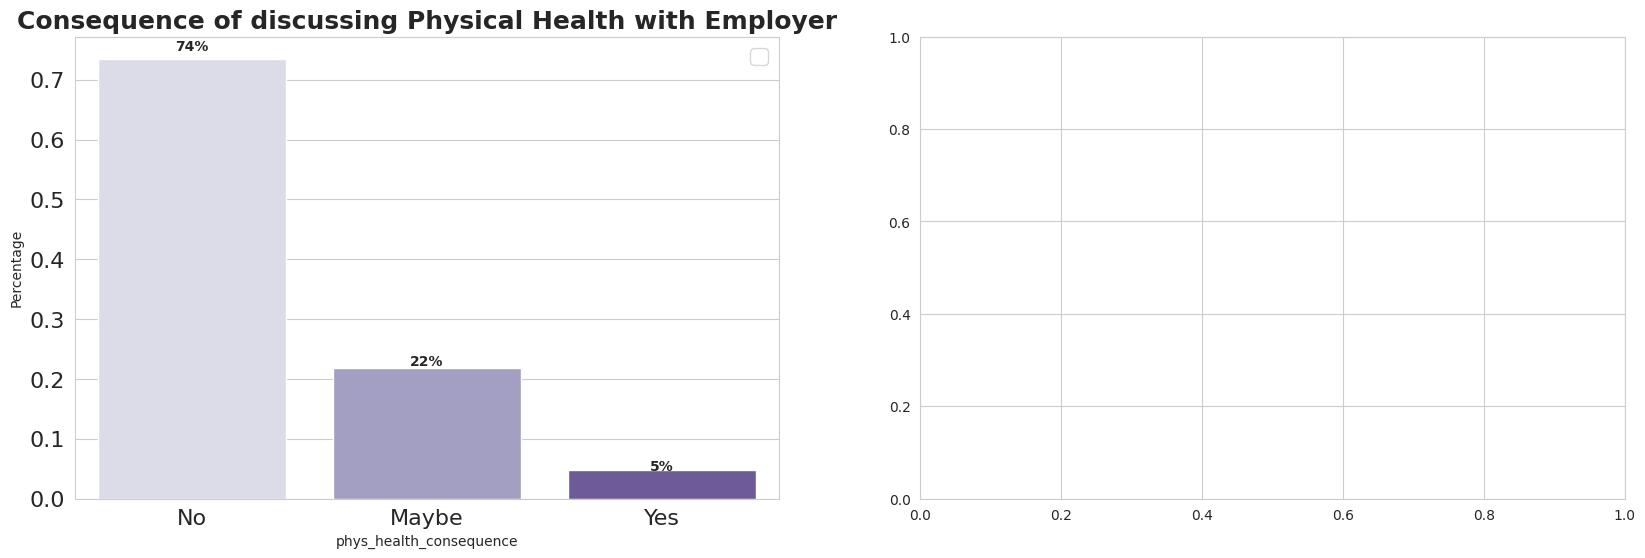

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['phys_health_consequence'], hue = df['treatment'], palette='Purples')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

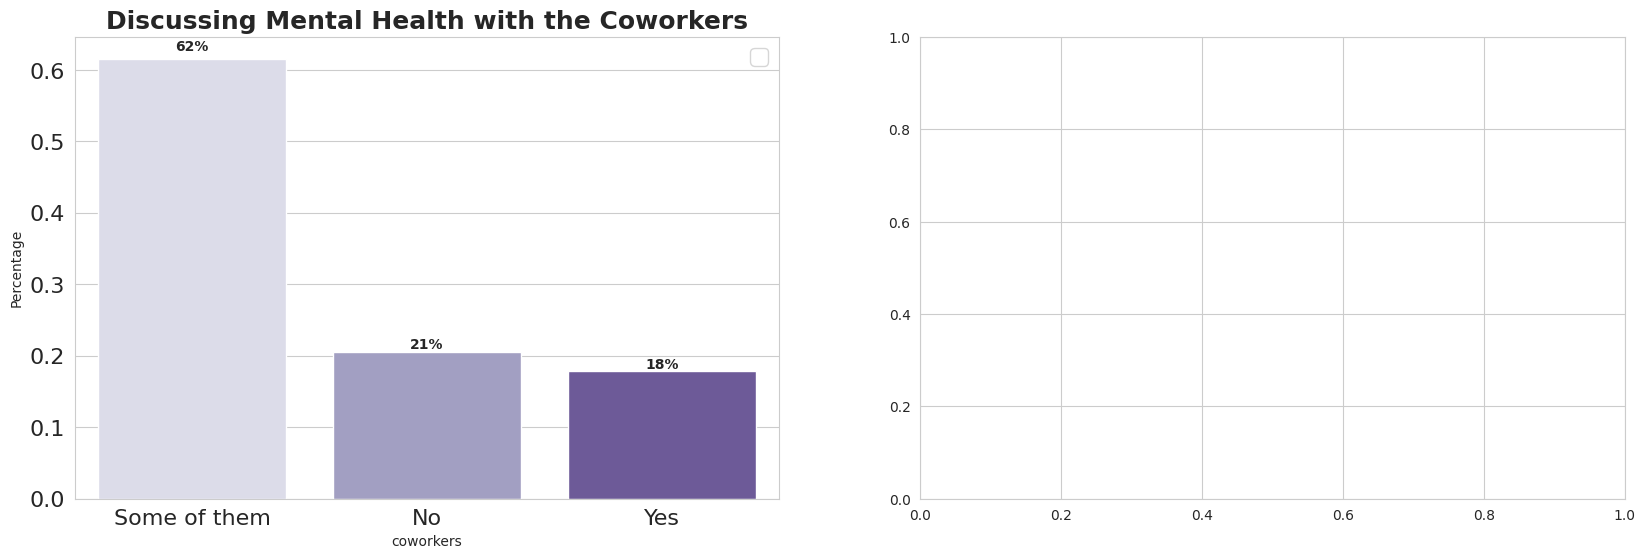

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['coworkers'], hue = df['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

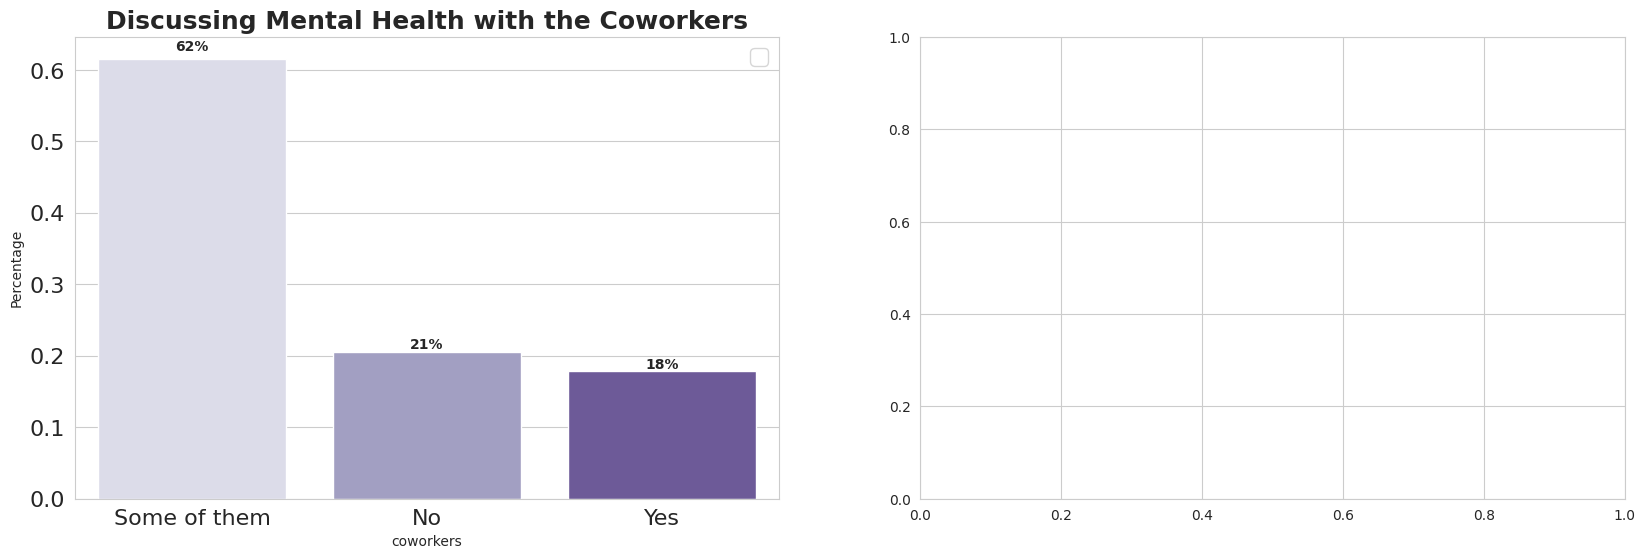

In [47]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['coworkers'], hue = df['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


ValueError: Cannot use `hue` without `x` and `y`

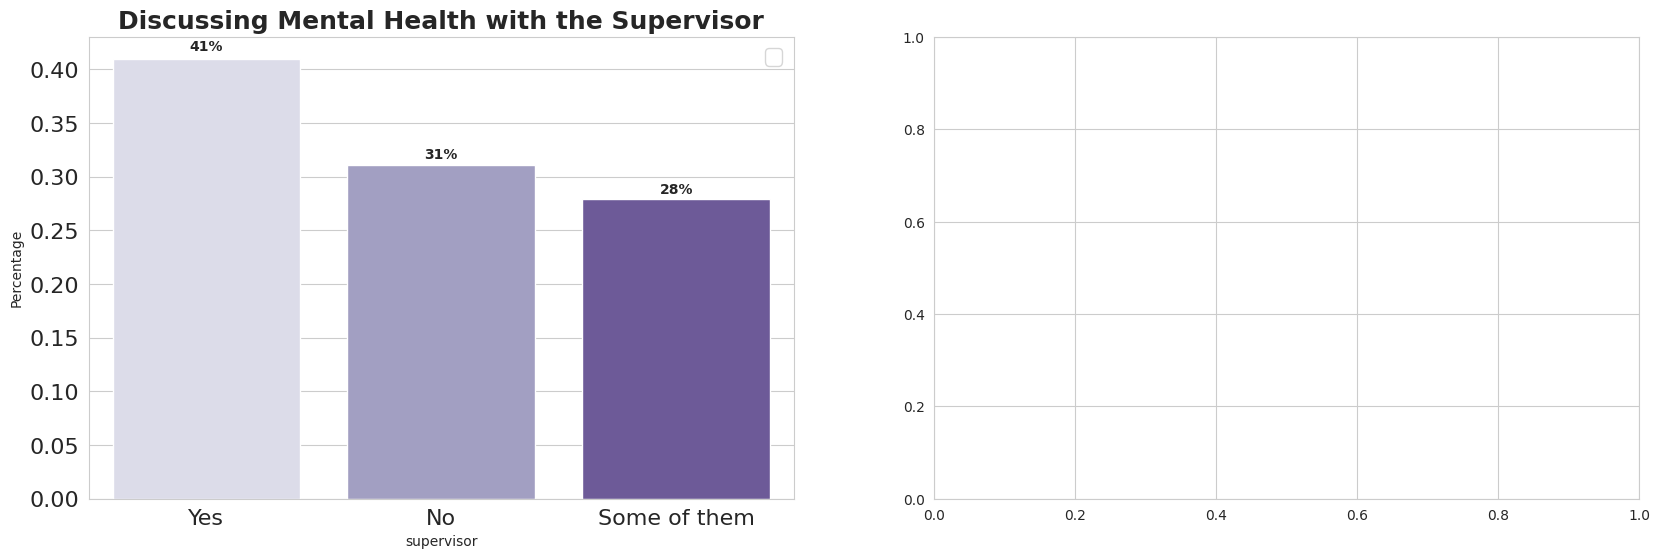

In [48]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'supervisor', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['supervisor'], hue = df['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

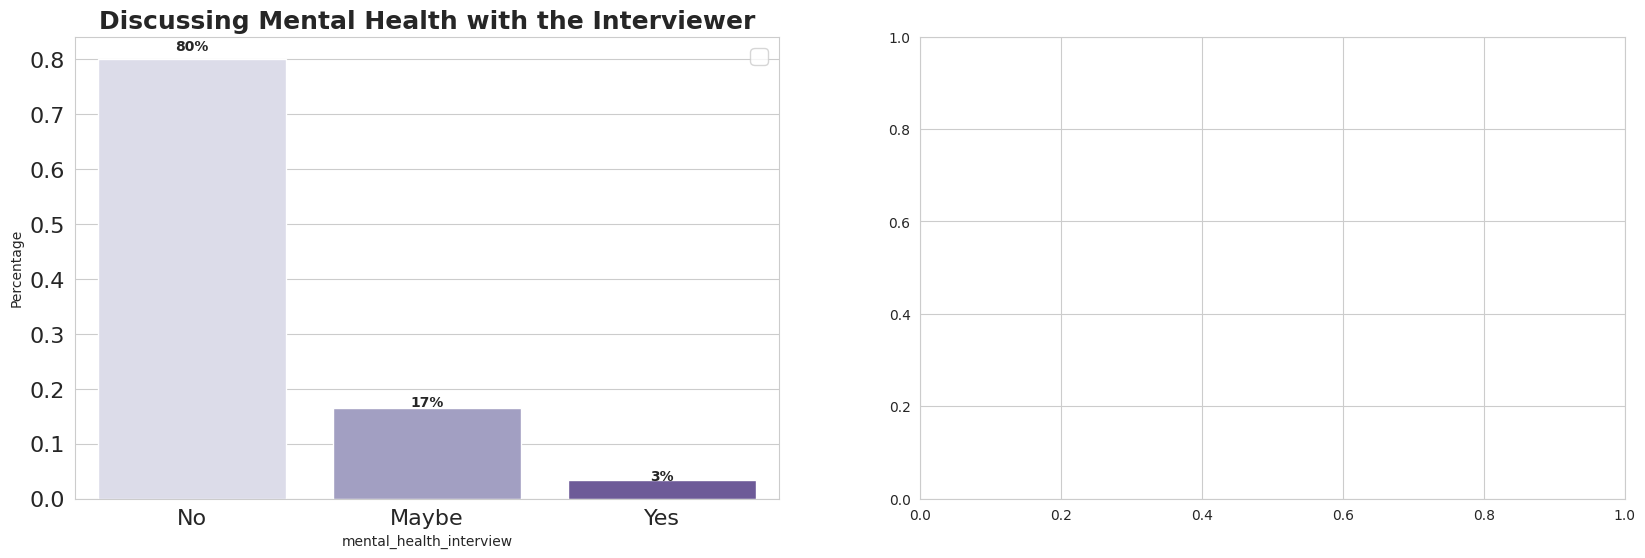

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_interview'], hue = df['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

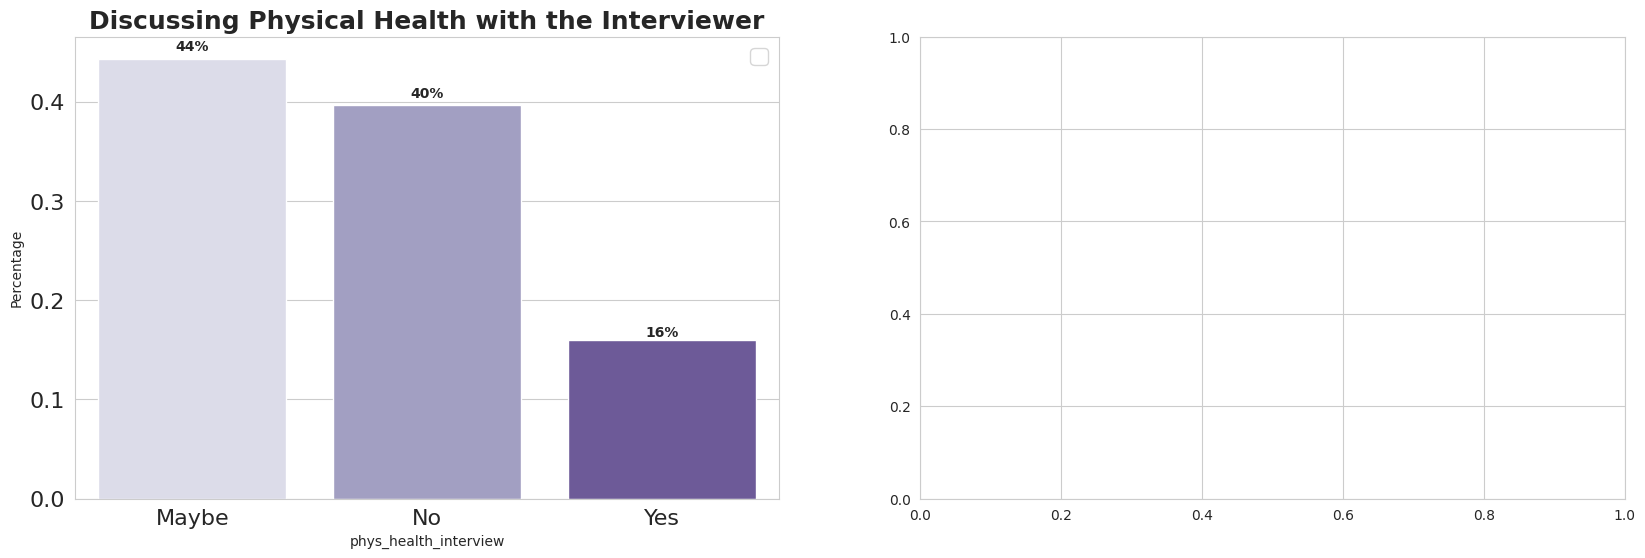

In [50]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_interview'].value_counts(normalize = True).rename_axis('phys_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['phys_health_interview'], hue = df['treatment'], palette='Purples')
plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

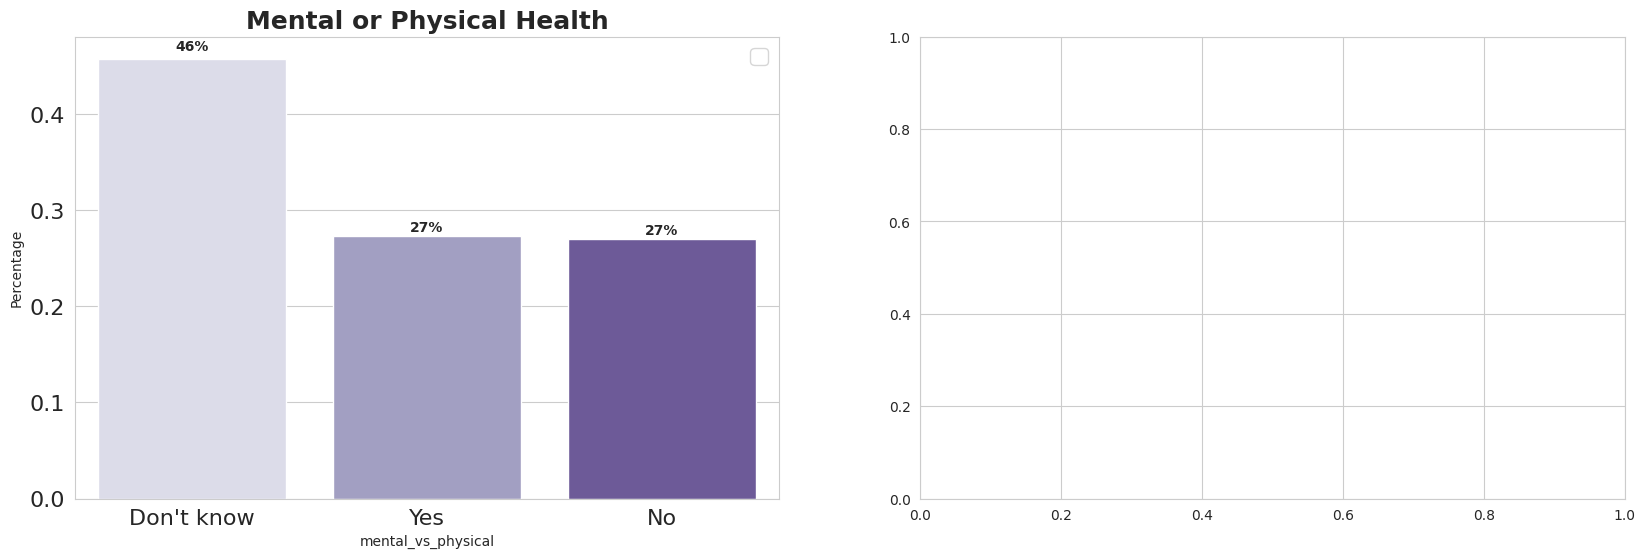

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_vs_physical'], hue = df['treatment'], palette='Purples')
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: Cannot use `hue` without `x` and `y`

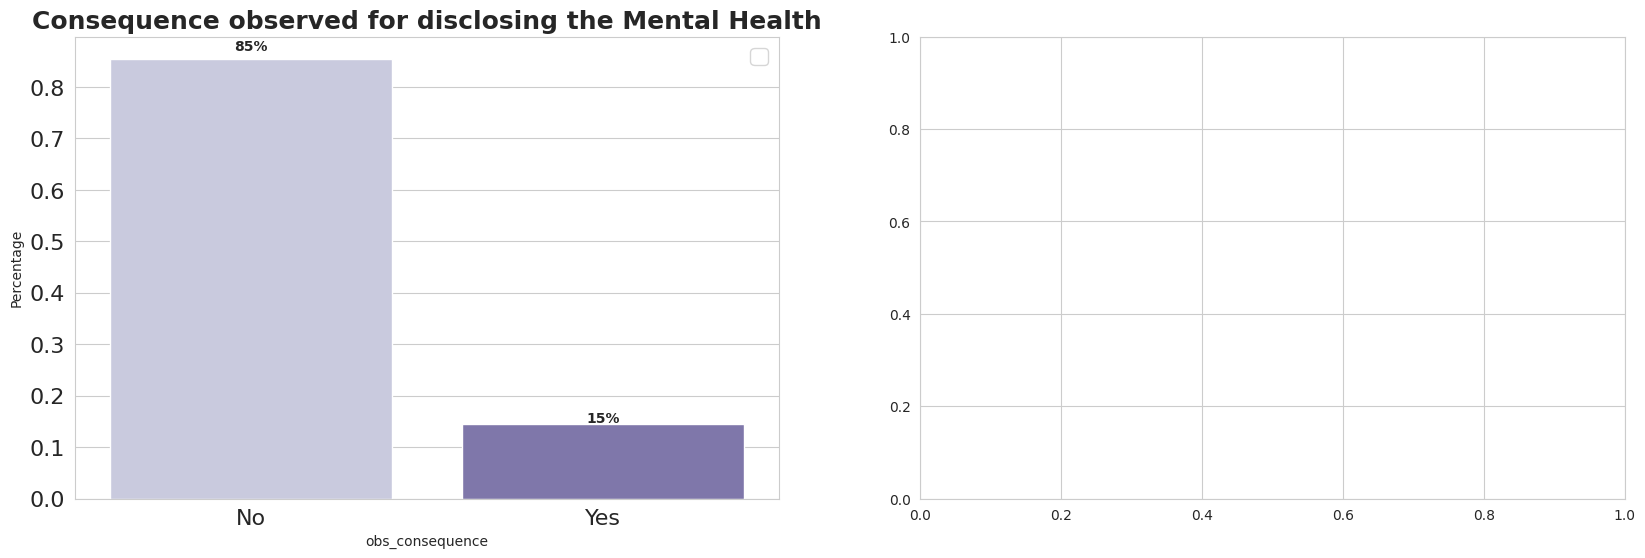

In [52]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['obs_consequence'], hue = df['treatment'], palette='Purples')
    
plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

In [54]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [55]:
df.isnull().sum()

Age                           0
Gender                        0
self_employed                18
family_history                0
treatment                     0
work_interfere                0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [56]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means'] 
SELF_EMPLOYED :[nan 'Yes' 'No'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
B

In [57]:
df['treatment'].value_counts()

treatment
Yes    633
No     621
Name: count, dtype: int64

In [58]:
# Compute the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='OrRd', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

ValueError: could not convert string to float: 'Female'

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [60]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)


In [61]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier',
       'GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), 
         DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), 
         GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

NameError: name 'RandomForestClassifier' is not defined

In [62]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

NameError: name 'models' is not defined

In [63]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

KeyError: 'LogisticRegression'

<Figure size 1000x500 with 0 Axes>